In [36]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import ttest_ind
import time
import os
import pickle

## import self-written packages 
from adafdr.util import *
import adafdr.method as md
import adafdr.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
data_list = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum',
             'Artery_Aorta', 'Breast_Mammary_Tissue',
             'Cells_EBV-transformed_lymphocytes',
             'Colon_Sigmoid', 'Colon_Transverse', 
             'Esophagus_Gastroesophageal_Junction',
             'Esophagus_Mucosa', 'Esophagus_Muscularis',
             'Heart_Atrial_Appendage', 'Heart_Left_Ventricle',
             'Lung', 'Muscle_Skeletal', 'Pancreas', 'Stomach', 'Whole_Blood']
# data_list = ['Adipose_Subcutaneous']
# data_list = ['GTEx_small']
output_figure_folder = '/home/martin/NeuralFDR2/figures/fig_gtex_results'

# Load result

Adipose_Subcutaneous
Adipose_Visceral_Omentum
Artery_Aorta
Breast_Mammary_Tissue
Cells_EBV-transformed_lymphocytes
Colon_Sigmoid
Colon_Transverse
Esophagus_Gastroesophageal_Junction
Esophagus_Mucosa
Esophagus_Muscularis
Heart_Atrial_Appendage
Heart_Left_Ventricle
Lung
Muscle_Skeletal
Pancreas
Stomach
Whole_Blood


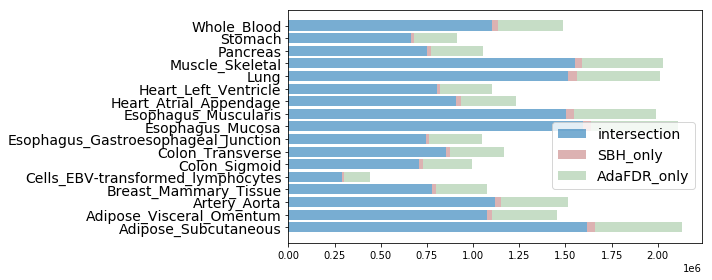

In [73]:
n_rej_overlap = np.zeros([len(data_list)], dtype=int)
n_rej_sbh_only = np.zeros([len(data_list)], dtype=int)
n_rej_nfdr_only = np.zeros([len(data_list)], dtype=int)
for i_data,data_name in enumerate(data_list):
    # Load results
    print(data_name)
    res_GTEx_path = '/data3/martin/gtex_data/results/' + \
                    'result_GTEx_%s.pickle'%data_name
    fil = open(res_GTEx_path,'rb') 
    result_dic = pickle.load(fil)
    fil.close()  
    h_hat_sbh = result_dic['sbh']['h_hat']
    h_hat_nfdr = result_dic['nfdr']['h_hat']
    n_rej_overlap[i_data] = np.sum(h_hat_sbh&h_hat_nfdr)
    n_rej_sbh_only[i_data] = np.sum(h_hat_sbh & (~h_hat_nfdr))
    n_rej_nfdr_only[i_data] = np.sum((~h_hat_sbh) & h_hat_nfdr)
#     print('n_sbh=%d, miss=%0.1f, more=%0.1f'%(n_rej_sbh[i_data]))
#     print('# D_bh=%d'%np.sum(result_dic['bh']['h_hat']))
#     print('# D_sbh=%d'%np.sum(h_hat_sbh))
#     print('# D_nfdr=%d, D_overlap=%d'\
#           %(np.sum(h_hat_nfdr), np.sum(h_hat_sbh*h_hat_nfdr)))
#     print('')
y_val = np.arange(len(data_list))
plt.figure(figsize=[10,4])
plt.barh(y_val, n_rej_overlap, alpha=0.6, label='intersection')
plt.barh(y_val, n_rej_sbh_only, left=n_rej_overlap, color='darkred', alpha=0.3,
         label='SBH_only')
plt.barh(y_val, n_rej_nfdr_only, left=n_rej_overlap+n_rej_sbh_only, color='darkseagreen',
         alpha=0.5,label='AdaFDR_only')
plt.yticks(y_val, data_list, rotation=0, fontsize=14)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), fontsize=14)
plt.tight_layout()
plt.savefig('%s/result_compare.png'%(output_figure_folder))
plt.savefig('%s/result_compare.pdf'%(output_figure_folder))
plt.show()

Adipose_Subcutaneous
load Adipose_Subcutaneous
# max / # 2nd max:  1.0490967527429902
# max / # 2nd max:  10.450132796043594
# max / # 2nd max:  1.0263157894736843
# max / # 2nd max:  2.023555167490048


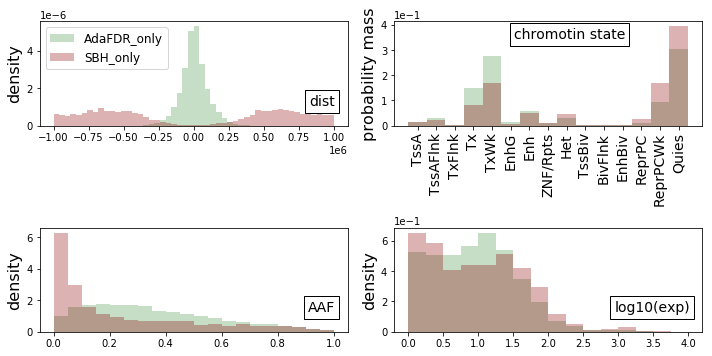

Adipose_Visceral_Omentum
load Adipose_Visceral_Omentum
# max / # 2nd max:  1.1306796365032639
# max / # 2nd max:  9.805898663977818
# max / # 2nd max:  1.0
# max / # 2nd max:  2.074759691779853


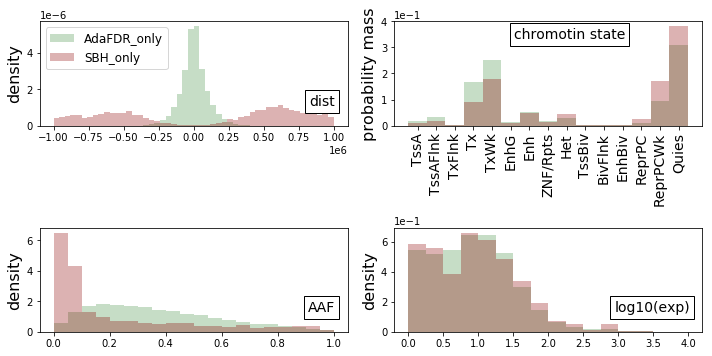

Artery_Aorta
load Artery_Aorta
# max / # 2nd max:  1.0840583418628456
# max / # 2nd max:  11.27820549927641
# max / # 2nd max:  1.096774193548387
# max / # 2nd max:  1.6590322327320781


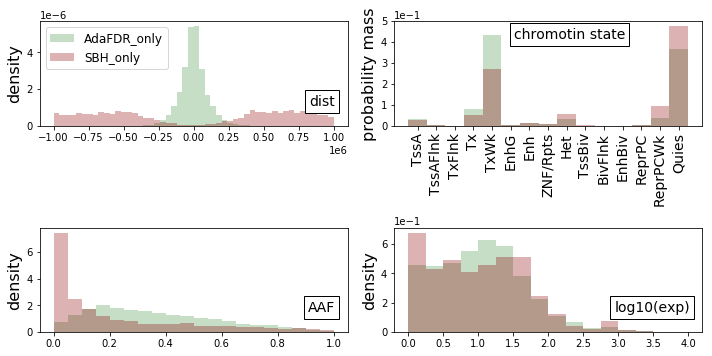

Breast_Mammary_Tissue
load Breast_Mammary_Tissue
# max / # 2nd max:  1.9195196024295968
# max / # 2nd max:  9.342552330872687
# max / # 2nd max:  1.0
# max / # 2nd max:  1.9150992678617837


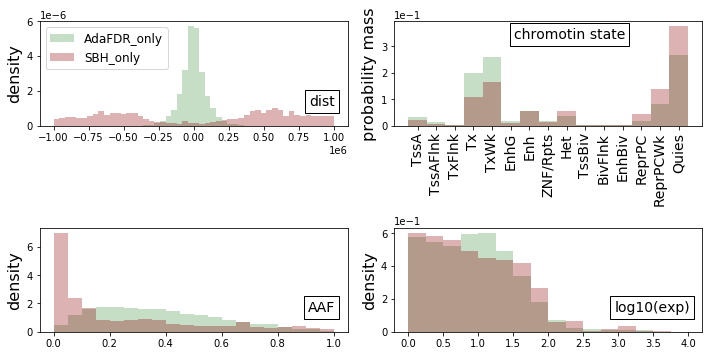

Cells_EBV-transformed_lymphocytes
load Cells_EBV-transformed_lymphocytes
# max / # 2nd max:  1.0067962997923352
# max / # 2nd max:  7.402393632251045
# max / # 2nd max:  1.0952380952380953
# max / # 2nd max:  2.8855585643410255


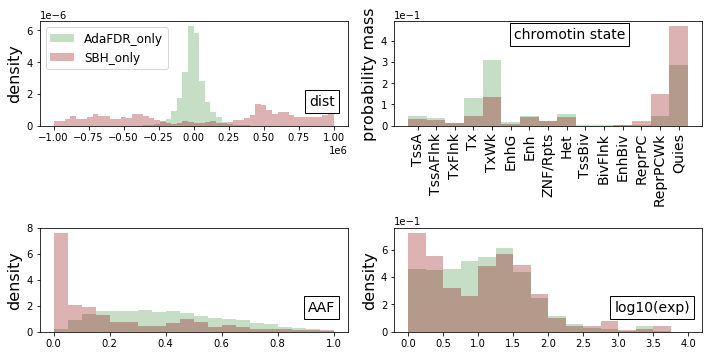

Colon_Sigmoid
load Colon_Sigmoid
# max / # 2nd max:  1.0009651178822556
# max / # 2nd max:  9.29698191269294
# max / # 2nd max:  1.0357142857142858
# max / # 2nd max:  1.8241247689669056


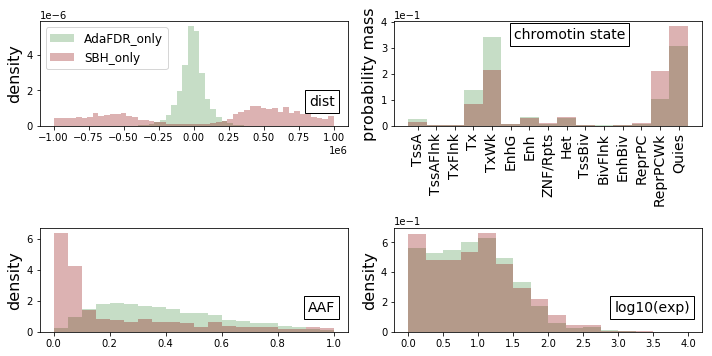

Colon_Transverse
load Colon_Transverse
# max / # 2nd max:  1.1385635018495683
# max / # 2nd max:  10.374623514593944
# max / # 2nd max:  1.0
# max / # 2nd max:  2.991259161129036


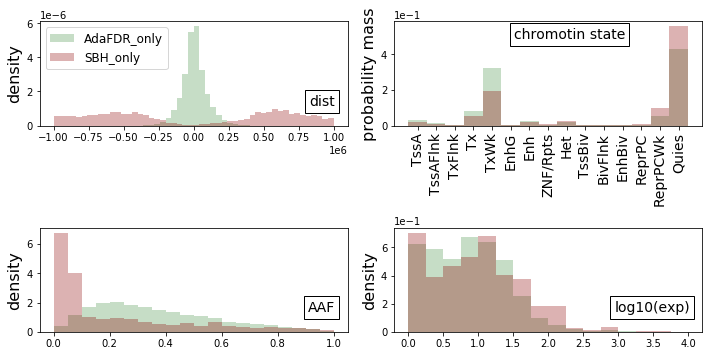

Esophagus_Gastroesophageal_Junction
load Esophagus_Gastroesophageal_Junction
# max / # 2nd max:  1.0115806888253873
# max / # 2nd max:  9.071160244713964
# max / # 2nd max:  1.0
# max / # 2nd max:  2.004013936310296


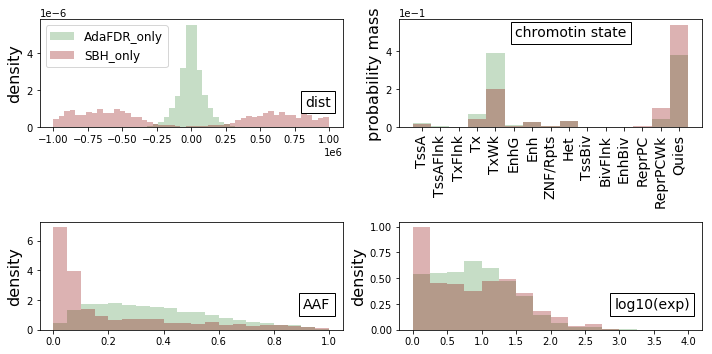

Esophagus_Mucosa
load Esophagus_Mucosa
# max / # 2nd max:  1.1605335786568538
# max / # 2nd max:  9.03833959115561
# max / # 2nd max:  1.0277777777777777
# max / # 2nd max:  1.8874990634287665


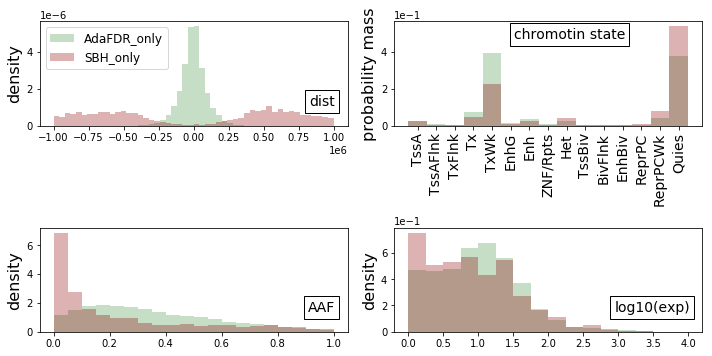

Esophagus_Muscularis
load Esophagus_Muscularis
# max / # 2nd max:  1.0238757533611498
# max / # 2nd max:  10.364921517012771
# max / # 2nd max:  1.2222222222222223
# max / # 2nd max:  1.9160368345901204


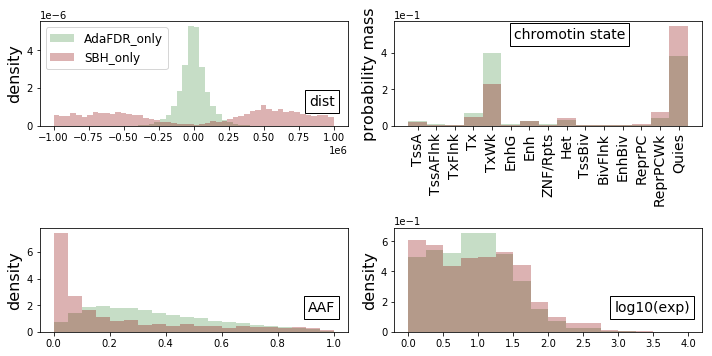

Heart_Atrial_Appendage
load Heart_Atrial_Appendage
# max / # 2nd max:  1.0654005785435794
# max / # 2nd max:  10.516816617354024
# max / # 2nd max:  1.1481481481481481
# max / # 2nd max:  2.330818692897514


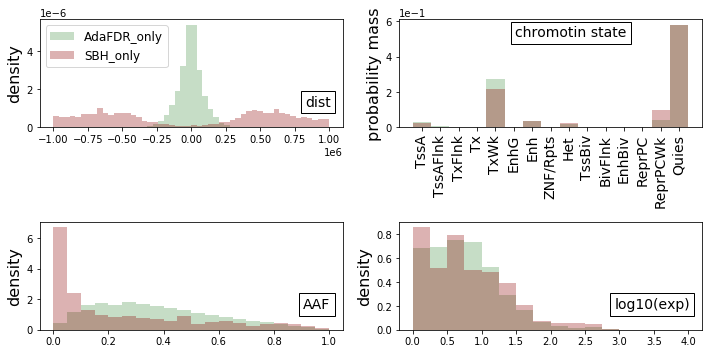

Heart_Left_Ventricle
load Heart_Left_Ventricle
# max / # 2nd max:  1.0839276617422313
# max / # 2nd max:  10.807752750130959
# max / # 2nd max:  1.09375
# max / # 2nd max:  1.5478642768773658


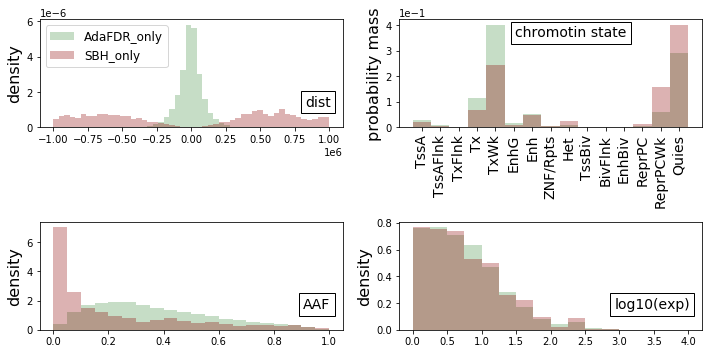

Lung
load Lung
# max / # 2nd max:  1.001536098310292
# max / # 2nd max:  10.601079022532529
# max / # 2nd max:  1.0
# max / # 2nd max:  2.0180953093085767


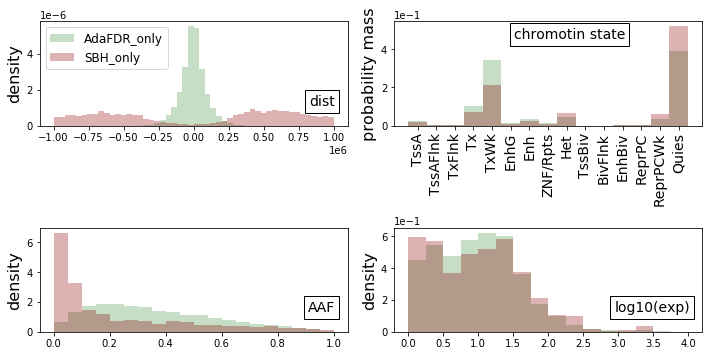

Muscle_Skeletal
load Muscle_Skeletal
# max / # 2nd max:  1.0701852265119394
# max / # 2nd max:  10.15810427574171
# max / # 2nd max:  1.0588235294117647
# max / # 2nd max:  1.8404952054195869


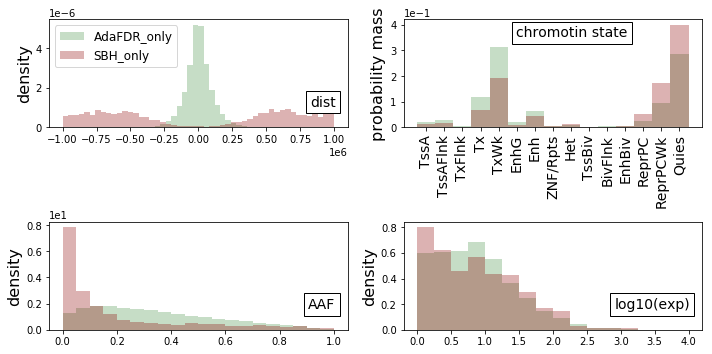

Pancreas
load Pancreas
# max / # 2nd max:  1.1292450182430536
# max / # 2nd max:  11.69414540628226
# max / # 2nd max:  1.0
# max / # 2nd max:  1.718036407446113


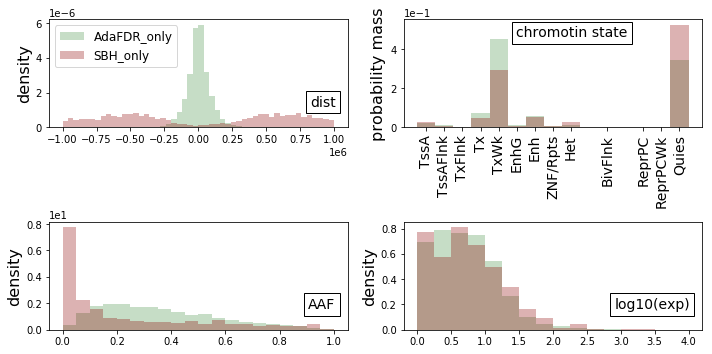

Stomach
load Stomach
# max / # 2nd max:  1.0840257303671939
# max / # 2nd max:  12.13864388092613
# max / # 2nd max:  1.037037037037037
# max / # 2nd max:  2.659900869453026


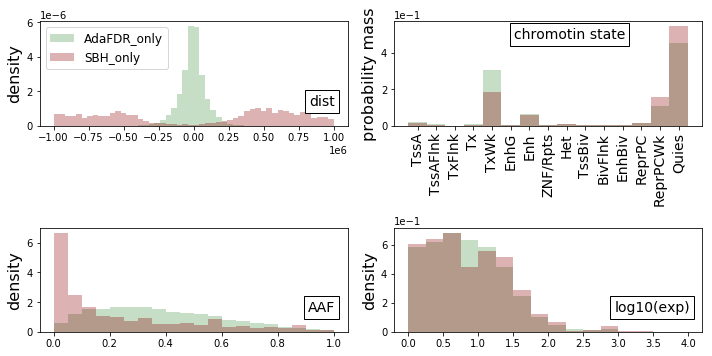

Whole_Blood
load Whole_Blood
# max / # 2nd max:  1.0242155525238745
# max / # 2nd max:  10.649958770173166
# max / # 2nd max:  1.0606060606060606
# max / # 2nd max:  2.314421182508298


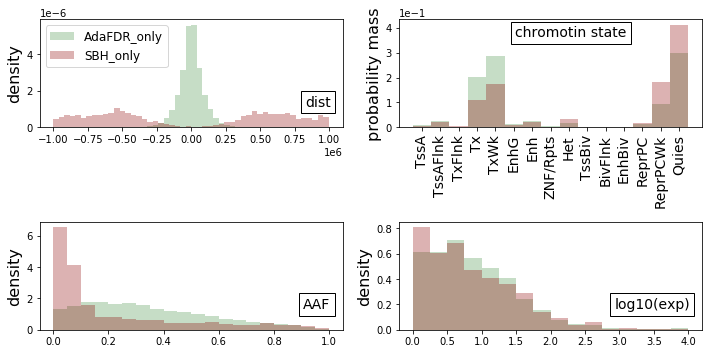

In [86]:
name_list = ['log10(exp)', 'AAF', 'dist', 'chromotin state']
bin_list = [np.linspace(0,4,17), np.linspace(0,1,21), np.linspace(-1e6,1e6,51)]
pic_order = [4, 3, 1, 2]
# Univar
for data_name in data_list:
    # Load results
    print(data_name)
    res_GTEx_path = '/data3/martin/gtex_data/results/' + \
                    'result_GTEx_%s.pickle'%data_name
    fil = open(res_GTEx_path,'rb') 
    result_dic = pickle.load(fil)
    fil.close()  
    h_hat_sbh = result_dic['sbh']['h_hat']
    h_hat_nfdr = result_dic['nfdr']['h_hat']
    # Load data
    p, x, n_full, cate_name, cis_name = dl.load_GTEx(data_name)
    # Generate figure
    nfdr_only = x[h_hat_nfdr&(~h_hat_sbh), :]
    sbh_only = x[(~h_hat_nfdr)& h_hat_sbh, :]
    plt.figure(figsize=[10,5])
    for i_pic in range(4):
        # Remove imputed values 
        temp_x = nfdr_only[:, i_pic]
        temp_x_sbh = sbh_only[:, i_pic]
        val,cts = np.unique(x[:, i_pic], return_counts=True)
        temp_sort = np.sort(cts)
        print('# max / # 2nd max: ', temp_sort[-1]/temp_sort[-2])
        if temp_sort[-1]/temp_sort[-2] > 5:
            temp_x = temp_x[temp_x != val[cts==temp_sort[-1]]] 
            temp_x_sbh = temp_x_sbh[temp_x_sbh != val[cts==temp_sort[-1]]]
        ax1 = plt.subplot(2,2,pic_order[i_pic])
        if i_pic<3:
            bin_width = bin_list[i_pic][1] - bin_list[i_pic][0]
            temp_h,_ = np.histogram(temp_x, bins=bin_list[i_pic])
            temp_h = temp_h / np.sum(temp_h)/ bin_width
            ax1.bar(bin_list[i_pic][1:]-bin_width/2, temp_h, width=bin_width,
                    alpha=0.5, color='darkseagreen', label='AdaFDR_only')
            ax1.set_ylabel('density', fontsize=16) 
            if i_pic == 2:
                ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            temp_h,_ = np.histogram(temp_x_sbh, bins=bin_list[i_pic])
            temp_h = temp_h / np.sum(temp_h)/ bin_width
            ax1.bar(bin_list[i_pic][1:]-bin_width/2, temp_h, width=bin_width, 
                    alpha=0.3, color='darkred', label='SBH_only')
            if i_pic == 2:
                ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            if i_pic == 2:
                plt.legend(fontsize=12, loc='upper left')
            plt.annotate(name_list[i_pic], xy=(0.96, 0.3), xycoords='axes fraction',
                     size=14, ha='right', va='top',
                     bbox=dict(boxstyle='square', fc='w'))
        else:
            bins = np.arange(16)+0.5
            bin_width = 1
            temp_h,_ = np.histogram(temp_x, bins=bins)
            temp_h = temp_h / np.sum(temp_h)/ bin_width
            ax1.bar(bins[1:]-bin_width/2, temp_h, width=bin_width,
                    alpha=0.5, color='darkseagreen', label='AdaFDR_only')        
            cate_name_ = []
            x_val = np.unique(temp_x)
            for val in x_val:
                cate_name_.append(cate_name[3][val])
            plt.xticks(x_val, cate_name_, rotation=90, fontsize=14)
            ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            ax1.set_ylabel('probability mass', fontsize=16) 
            temp_h,_ = np.histogram(temp_x_sbh, bins=bins)
            temp_h = temp_h / np.sum(temp_h)/ bin_width
            ax1.bar(bins[1:]-bin_width/2, temp_h, width=bin_width,
                    alpha=0.3, color='darkred', label='SBH_only')
            plt.annotate(name_list[i_pic], xy=(0.75, 0.94), xycoords='axes fraction',
                     size=14, ha='right', va='top',
                     bbox=dict(boxstyle='square', fc='w'))
    plt.tight_layout()
    plt.savefig('%s/univar_%s.png'%(output_figure_folder, data_name))
    plt.savefig('%s/univar_%s.pdf'%(output_figure_folder, data_name))
    plt.show()